# Longer runs

_15 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

Since the neural network plots don't seem to indicate that the digital scheme eventually catches up to the analog scheme, I ran the experiments for 1200 rounds to see if it shows anything interesting.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

In [2]:
def get_comparison_specs(dataset, noise='__all__'):

    common_fixed_specs = {
        'rounds': 1200,
        'batch_size': 64,
        'epochs': 1,
        'ema_coefficient': 1 / 3,
        'data_per_client': None,
        'save_squared_error': False,
        'send': 'deltas',
    }

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'power_update_period': 1,
        'power_quantile': 0.9,
        'power_factor': 0.9,
    })
    title_specs = {
        'power': 1.0,
        'clients': 20,
        'dataset': dataset,
        'lr_client': 0.001 if dataset == 'cifar10' else 0.01,
        'momentum_client': 0.9 if dataset == 'cifar10' else 0.0,
    }
    series_specs = {
        'noise': noise,
    }

    all_analog_specs = title_specs, fixed_specs, series_specs

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'qrange_update_period': 1,
        'qrange_param_quantile': 0.9,
        'qrange_client_quantile': 0.9,
        'channel_uses': None,
        'rounding_method': 'stochastic',
        'parameter_schedule': 'staggered',
        'zero_bits_strategy': 'read-zero',
    })

    all_digital_specs = title_specs, fixed_specs, series_specs
    
    return all_analog_specs, all_digital_specs

def plot_analog_vs_digital(paths, dataset, noise='__all__', **kwargs):
    all_specs = get_comparison_specs(dataset, noise)
    plot_comparison('accuracy', *paths, *all_specs, **kwargs)
    plt.grid()

In [3]:
analog_path = [
    Path("results/20210813-popeye1-cifarmnist-long-dynpower/"),
    Path("results/20210813-popeye2-cifarmnist-long-dynpower/"),
]
digital_path = [
    Path("results/20210813-popeye1-cifarmnist-long-dynquant/"),
    Path("results/20210813-popeye2-cifarmnist-long-dynquant/"),
]
paths = analog_path, digital_path

In [4]:
show_timestamp_info(analog_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **13 Aug 2021, 14:19:53** | 13 Aug 2021, 17:23:31 | 3 h 03 min 37 s |
| last to finish | 14 Aug 2021, 13:20:56 | **14 Aug 2021, 18:30:07** | 5 h 09 min 11 s |
| shortest | 14 Aug 2021, 08:20:22 | 14 Aug 2021, 11:19:55 | **2 h 59 min 32 s** |
| longest | 14 Aug 2021, 01:50:25 | 14 Aug 2021, 07:37:04 | **5 h 46 min 39 s** |


In [5]:
show_timestamp_info(digital_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **13 Aug 2021, 14:19:53** | 13 Aug 2021, 17:30:24 | 3 h 10 min 31 s |
| last to finish | 14 Aug 2021, 13:45:35 | **14 Aug 2021, 18:55:30** | 5 h 09 min 54 s |
| shortest | 13 Aug 2021, 14:19:53 | 13 Aug 2021, 17:21:38 | **3 h 01 min 45 s** |
| longest | 14 Aug 2021, 02:04:23 | 14 Aug 2021, 07:57:39 | **5 h 53 min 15 s** |


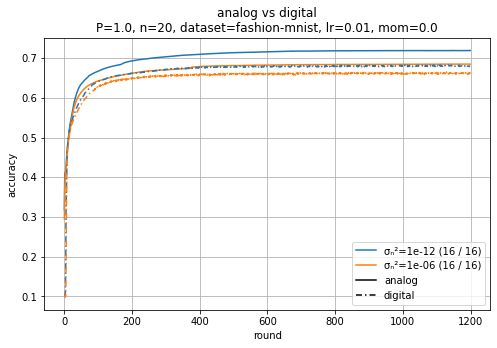

In [6]:
plot_analog_vs_digital(paths, 'fashion-mnist')

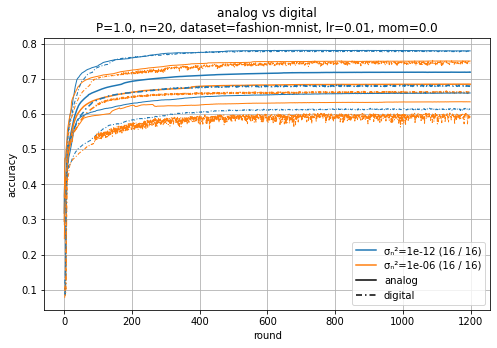

In [7]:
plot_analog_vs_digital(paths, 'fashion-mnist', plot_quartiles=True)

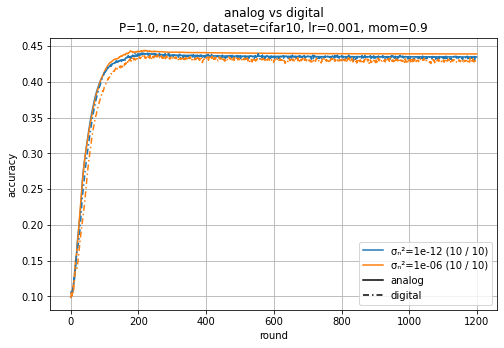

In [8]:
plot_analog_vs_digital(paths, 'cifar10')

(0.4, 0.47)

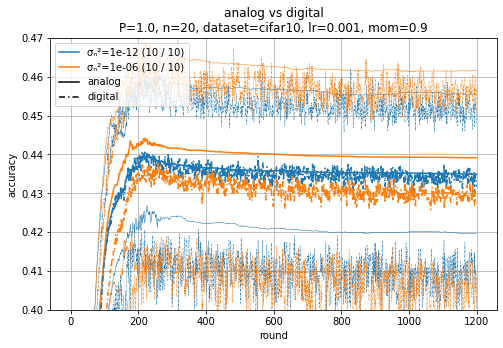

In [9]:
plot_analog_vs_digital(paths, 'cifar10', plot_range=True)
plt.ylim((0.40, 0.47))

# Simple (non-federated) learning

This is mostly a check to see what the convergence accuracy for this model is.

In [10]:
results_dir = Path("results/20210813-fmnist-simple-long/")
show_timestamp_info(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **13 Aug 2021, 14:08:58** | 14 Aug 2021, 12:47:29 | 22 h 38 min 30 s |
| last to finish | 13 Aug 2021, 14:08:58 | **14 Aug 2021, 12:47:29** | 22 h 38 min 30 s |
| shortest | 13 Aug 2021, 14:08:58 | 14 Aug 2021, 12:47:29 | **22 h 38 min 30 s** |
| longest | 13 Aug 2021, 14:08:58 | 14 Aug 2021, 12:47:29 | **22 h 38 min 30 s** |


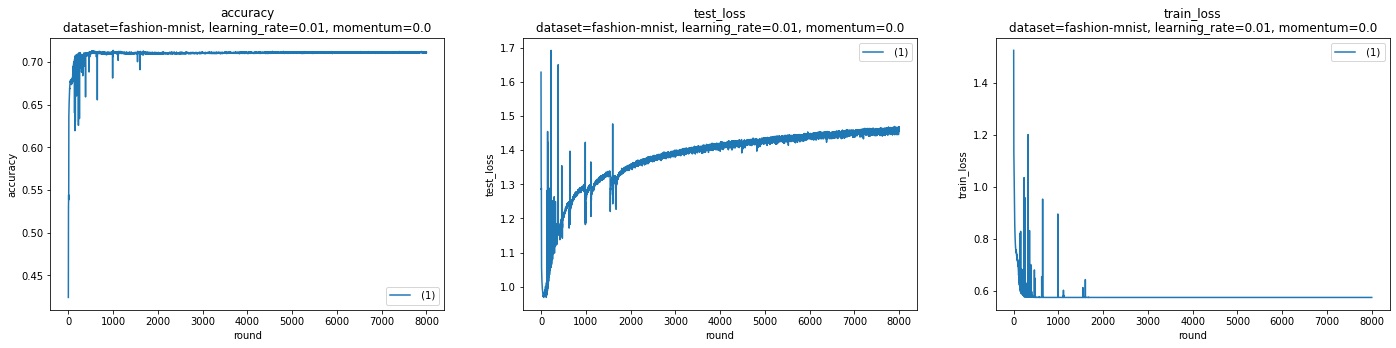

In [11]:
fixed_specs = {
    'batch_size': 64,
    'epochs': 8000,
}
title_specs = {
    'dataset': 'fashion-mnist',
    'learning_rate': 0.01,
    'momentum': 0.0,
}
series_specs = {}

plot_averaged_training_charts(results_dir, ['accuracy', 'test_loss', 'train_loss'], title_specs, fixed_specs, series_specs)

This does kind of seem like it overfitted.

In [12]:
results_dir = Path("results/20210813-cifar10-simple-long/")
show_timestamp_info(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **13 Aug 2021, 14:21:53** | 14 Aug 2021, 23:51:43 | 1 days, 09 h 29 min 50 s |
| last to finish | 13 Aug 2021, 14:21:53 | **14 Aug 2021, 23:51:43** | 1 days, 09 h 29 min 50 s |
| shortest | 13 Aug 2021, 14:21:53 | 14 Aug 2021, 23:51:43 | **1 days, 09 h 29 min 50 s** |
| longest | 13 Aug 2021, 14:21:53 | 14 Aug 2021, 23:51:43 | **1 days, 09 h 29 min 50 s** |


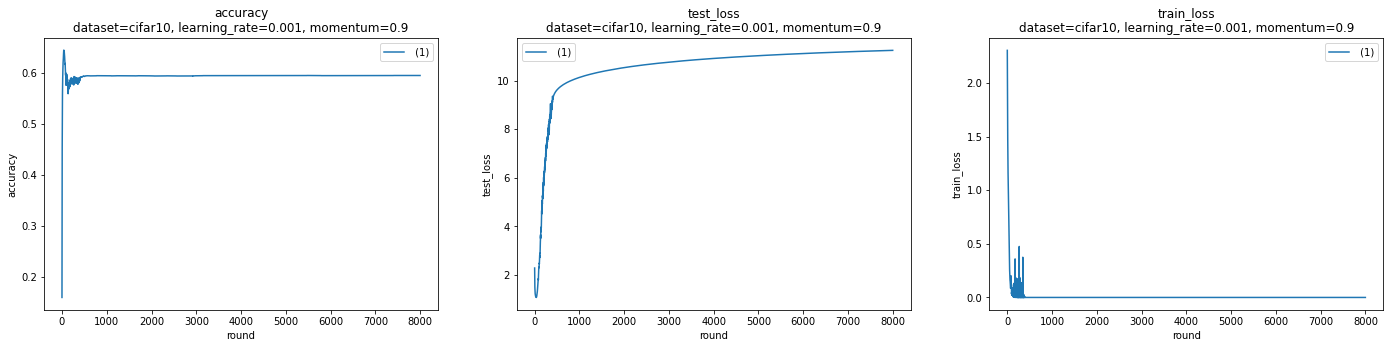

In [13]:
fixed_specs = {
    'batch_size': 64,
    'epochs': 8000,
}
title_specs = {
    'dataset': 'cifar10',
    'learning_rate': 0.001,
    'momentum': 0.9,
}
series_specs = {}

plot_averaged_training_charts(results_dir, ['accuracy', 'test_loss', 'train_loss'], title_specs, fixed_specs, series_specs)